### MODEL 2 - (SVD)

In [1]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630148 sha256=f0668f50bc7a517c97110ea3f97bebd19e8c38b15032219de0d5460a5d6a0931
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
from google.colab import files
uploaded = files.upload()

Saving movies_set6.csv to movies_set6.csv


In [3]:
import pandas as pd
import io

movies_dataFrame = pd.read_csv(io.BytesIO(uploaded['movies_set6.csv']))
print(movies_dataFrame.head(5))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
movies_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [5]:
len(movies_dataFrame), min(movies_dataFrame['movieId']),max(movies_dataFrame['movieId'])

(58098, 1, 193886)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving ratings_set6.csv to ratings_set6.csv


In [8]:
ratings_dataFrame = pd.read_csv(io.BytesIO(uploaded['ratings_set6.csv']))
print(ratings_dataFrame.head(5))

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [9]:
ratings_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
print(f'Number of unique users in the ratings dataFrame : {len(ratings_dataFrame.userId.unique())}, Total number of ratings : {len(ratings_dataFrame)}')
len(ratings_dataFrame), min(ratings_dataFrame['movieId']),max(ratings_dataFrame['movieId'])

Number of unique users in the ratings dataFrame : 610, Total number of ratings : 100836


(100836, 1, 193609)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from ast import literal_eval

In [13]:
print(movies_dataFrame.shape)
print(movies_dataFrame.columns)
movies_dataFrame.head(3)

(58098, 3)
Index(['movieId', 'title', 'genres'], dtype='object')


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


(100836, 4)
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Bar plot for rating ranging from 0.5 - 5.0 vs Number of movies: 


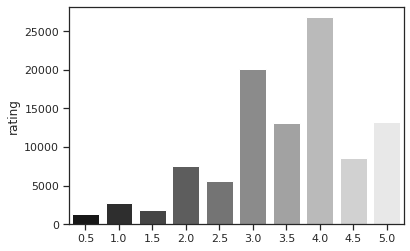

In [14]:
print(ratings_dataFrame.shape)
print(ratings_dataFrame.columns)
ratings_dataFrame.head(3)

count_of_eachRating = ratings_dataFrame.rating.value_counts()
sns.set_theme(style="ticks")
print()
print("Bar plot for rating ranging from 0.5 - 5.0 vs Number of movies: ")
sns.barplot(x=count_of_eachRating.index, y=count_of_eachRating,palette = "gist_gray")

In [17]:
new_ratings_dataFrame = ratings_dataFrame.dropna() # without na values

# converting timestamp into readable format.
new_ratings_dataFrame['timestamp'] = pd.to_datetime(new_ratings_dataFrame['timestamp'], unit='s')
new_ratings_dataFrame.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [18]:
ratings_parsed = Reader() #parse a file containing ratings.
user_ratings = Dataset.load_from_df(new_ratings_dataFrame[['userId', 'movieId', 'rating']], ratings_parsed)

# Split the Data into train and test set
train_set, test_set = train_test_split(user_ratings, test_size=.2)

In [19]:
svd = SVD() #SVD Model Training
model_inst = svd.fit(train_set) 

In [20]:
# 10-fold cross validation to validate the 
#performance of our movie recommendation system
cross_val_10Fold = cross_validate(model_inst, user_ratings, 
                                  measures=['RMSE', 'MAE'], 
                                  cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8601  0.8714  0.8643  0.8778  0.8719  0.8614  0.8630  0.8737  0.8731  0.8672  0.8684  0.0057  
MAE (testset)     0.6600  0.6716  0.6633  0.6717  0.6674  0.6625  0.6627  0.6734  0.6722  0.6612  0.6666  0.0050  
Fit time          5.96    5.93    5.91    5.87    5.89    5.91    5.89    5.90    6.00    6.83    6.01    0.28    
Test time         0.25    0.07    0.07    0.08    0.07    0.07    0.09    0.08    0.08    0.07    0.09    0.05    


In [25]:
mae_test_set = cross_val_10Fold['test_mae']
mae_test_set_dataFrame = pd.DataFrame(mae_test_set, columns=['Mean Absolute Error'])
mae_test_set_dataFrame.index = np.arange(1, len(mae_test_set_dataFrame) + 1)
mae_test_set_dataFrame.sort_values(by='Mean Absolute Error', ascending=False) #mean squared error per fold

#Print the "Mean Absolute Error" of each Fold
for i in range(len(mae_test_set)):
  print("MAE(Mean Absolute Error) of Fold",i+1,"is",round(mae_test_set[i],4))

MAE(Mean Absolute Error) of Fold 1 is 0.66
MAE(Mean Absolute Error) of Fold 2 is 0.6716
MAE(Mean Absolute Error) of Fold 3 is 0.6633
MAE(Mean Absolute Error) of Fold 4 is 0.6717
MAE(Mean Absolute Error) of Fold 5 is 0.6674
MAE(Mean Absolute Error) of Fold 6 is 0.6625
MAE(Mean Absolute Error) of Fold 7 is 0.6627
MAE(Mean Absolute Error) of Fold 8 is 0.6734
MAE(Mean Absolute Error) of Fold 9 is 0.6722
MAE(Mean Absolute Error) of Fold 10 is 0.6612



Bar plot for Mean Absolute Error vs Number of Folds: 



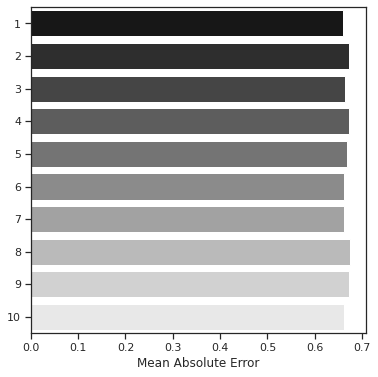

In [26]:
# plot to visualise the "Mean Absolute Error" of each of the Folds
plt.figure(figsize=(6,6))
sns.set_theme(style="ticks")
print()
print("Bar plot for Mean Absolute Error vs Number of Folds: ")
print()
sns.barplot(x='Mean Absolute Error', y=mae_test_set_dataFrame.index, data=mae_test_set_dataFrame, palette = "gist_gray",orient='h')

In [28]:
rmse_test_set = cross_val_10Fold['test_rmse']
rmse_test_set_dataFrame = pd.DataFrame(rmse_test_set, columns=['Root Mean Square Error'])
rmse_test_set_dataFrame.index = np.arange(1, len(rmse_test_set_dataFrame) + 1)
rmse_test_set_dataFrame.sort_values(by='Root Mean Square Error', ascending=False) # root mean square error per fold

#Print the "Root Mean Square Error" of each Fold
for i in range(len(rmse_test_set)):
  print("RMSE(Root Mean Square Error) of Fold",i+1,"is",round(rmse_test_set[i],4))

RMSE(Root Mean Square Error) of Fold 1 is 0.8601
RMSE(Root Mean Square Error) of Fold 2 is 0.8714
RMSE(Root Mean Square Error) of Fold 3 is 0.8643
RMSE(Root Mean Square Error) of Fold 4 is 0.8778
RMSE(Root Mean Square Error) of Fold 5 is 0.8719
RMSE(Root Mean Square Error) of Fold 6 is 0.8614
RMSE(Root Mean Square Error) of Fold 7 is 0.863
RMSE(Root Mean Square Error) of Fold 8 is 0.8737
RMSE(Root Mean Square Error) of Fold 9 is 0.8731
RMSE(Root Mean Square Error) of Fold 10 is 0.8672



Bar plot for Root Mean Square Error vs Number of Folds: 



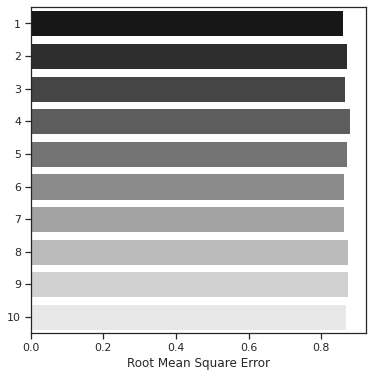

In [29]:
# plot to visualise the "Root Mean square Error" of each of the Folds
plt.figure(figsize=(6,6))
sns.set_theme(style="ticks")
print()
print("Bar plot for Root Mean Square Error vs Number of Folds: ")
print()
sns.barplot(x='Root Mean Square Error', y=rmse_test_set_dataFrame.index, data=rmse_test_set_dataFrame, palette = "gist_gray",orient='h')

In [41]:
# code to predict ratings for all the movies for a specific userId
userId = 120 
user_pred_Moviels = []
userId_ratings_dataFrame = ratings_dataFrame[ratings_dataFrame['userId'] == userId]
print(f'Total number of ratings given by the user: {userId_ratings_dataFrame.shape}')
print()
print(userId_ratings_dataFrame)
for movie_id, name in zip(movies_dataFrame.index, movies_dataFrame['title']):
    # check if the user has already rated a movie 
    rating_real = ratings_dataFrame.query(f'movieId == {movie_id}')['rating'].values[0] if movie_id in userId_ratings_dataFrame['movieId'].values else np.NaN
    rating_pred = model_inst.predict(userId, movie_id, rating_real, verbose=False) # generate the predictions
    user_pred_Moviels.append([movie_id, name, rating_pred.est, rating_real])     # add the prediction to the list of predictions created above

recmds_dataFrame = pd.DataFrame(user_pred_Moviels, columns=['movieId', 'title', 'predicted_rating', 'actual_rating'])
print()
print("************************************************************************************************************")
print()
print("Predicted and Actual ratings given by a specific user : ")
print()
recmds_dataFrame.sort_values(by='predicted_rating', ascending=False).head(15)

Total number of ratings given by the user: (22, 4)

       userId  movieId  rating  timestamp
18751     120        5     4.0  860070029
18752     120       12     3.0  860070182
18753     120       32     3.0  860069973
18754     120       52     3.0  860070065
18755     120      141     3.0  860069973
18756     120      260     5.0  860070065
18757     120      608     5.0  860070029
18758     120      631     3.0  860070216
18759     120      648     3.0  860069973
18760     120      653     3.0  860070065
18761     120      733     4.0  860070029
18762     120      736     3.0  860069973
18763     120      743     3.0  860070141
18764     120      765     3.0  860070306
18765     120      780     2.0  860069973
18766     120      783     3.0  860070141
18767     120      802     4.0  860070101
18768     120      852     2.0  860070141
18769     120      858     5.0  860070306
18770     120     1073     2.0  860070029
18771     120     1210     5.0  860070182
18772     120     1367  

,movieId,title,predicted_rating,actual_rating
858,858,Killer: A Journal of Murder (1995),4.373447,4.0
608,608,Loaded (1994),4.356813,5.0
912,912,Foreign Correspondent (1940),4.327421,NaN
318,318,Strawberry and Chocolate (Fresa y chocolate) (...,4.272703,NaN
2959,2959,Peter's Friends (1992),4.260909,NaN
50,50,Guardian Angel (1994),4.246037,NaN
750,750,"Last of the High Kings, The (a.k.a. Summer Fli...",4.205848,NaN
56782,56782,Mario Banana II (1964),4.199682,NaN
1203,1203,Annie Hall (1977),4.195233,NaN
930,930,My Man Godfrey (1936),4.177683,NaN


In [42]:
# code to predict rating for the combination of userId and movieId for a specific user
userId = 120
movieId = 260
org_rating = ratings_dataFrame.query(f'movieId == {movieId} & userId == {userId}')['rating'].values[0] 
print(ratings_dataFrame.query(f'movieId == {movieId} & userId == {userId}'))
title = movies_dataFrame[movies_dataFrame.index == movieId]['title'].values[0]

print(f'Movie title: {title}')
print(f'Original/True rating: {org_rating}')

predicted_rating = model_inst.predict(userId, movieId, org_rating, verbose=True) # rating prediction for specific user and item

       userId  movieId  rating  timestamp
18756     120      260     5.0  860070065
Movie title: Ladybird Ladybird (1994)
Original/True rating: 5.0
user: 120        item: 260        r_ui = 5.00   est = 4.18   {'was_impossible': False}
